# Project: Wrangle and Analyze Twitter Data

## Project Details

The tasks in this project are as follows:

- Data wrangling, which consists of:
    1. Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
    2. Assessing data
    3. Cleaning data
- Storing, analyzing, and visualizing the wrangled data
- Reporting on 1) the data wrangling efforts and 2) the data analyses and visualizations

## Gathering Data for this Project

Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

- The WeRateDogs Twitter archive. The dataset `twitter-archive-enhanced.csv` is manually downloaded from Udacity.
- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb

import requests 
import json 
import re 

### Load the 1st dataset

In [2]:
df_twitter = pd.read_csv("data/twitter-archive-enhanced.csv")
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Load the 2nd dataset

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
# response.content
with open("data/image-predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [4]:
df_predictions = pd.read_csv("data/image-predictions.tsv", sep='\t')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Load the 3rd dataset

In [5]:
# exec(open("twitter-api.py").read()) # query data from twitter

My developer account application wat rejected by Twitter. So I use the pre-arranged data.

In [6]:
count = 1
with open('data/tweet-json.txt') as json_file:
    for line in json_file:
        post = json.loads(line)
        
#         if count == 1: print(post)
        
        print()
        print("tweet_id:", post["id"])
        print(post["full_text"])

        count = count+1
        if count > 5: break


tweet_id: 892420643555336193
This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU

tweet_id: 892177421306343426
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV

tweet_id: 891815181378084864
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB

tweet_id: 891689557279858688
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ

tweet_id: 891327558926688256
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f


In [7]:
api = []
with open('data/tweet-json.txt') as json_file:
    for line in json_file:
        post = json.loads(line)
        api.append({"tweet_id": post["id"],
                    "retweet_count": post["retweet_count"],
                    "favorite_count": post["favorite_count"],
                    "retweeted": post["retweeted"],
                    "favorited": post["favorited"]})        
df_api = pd.DataFrame(api, columns = ["tweet_id", "retweet_count", "favorite_count"])
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing data

### Dataset \#1

In [8]:
df_twitter.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1247,711652651650457602,NaN,NaN,2016-03-20 20:36:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He just wanted to say hi. 9/10 v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711652651...,9,10,Gary,None,None,None,None
272,840761248237133825,NaN,NaN,2017-03-12 03:07:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Maddie and Gunner....,8.406323e+17,4.196984e+09,2017-03-11 18:35:42 +0000,"https://www.gofundme.com/3hgsuu0,https://twitt...",12,10,Maddie,None,None,None,None
626,795076730285391872,NaN,NaN,2016-11-06 01:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She loves going down slides bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,None,None,None,None
1055,742385895052087300,NaN,NaN,2016-06-13 15:59:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. That's his comfort stick. He hol...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742385895...,11,10,Phil,None,None,None,None
1748,679062614270468097,NaN,NaN,2015-12-21 22:15:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chompsky. He lives up to his name. 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679062614...,11,10,Chompsky,None,None,None,None
161,860563773140209665,NaN,NaN,2017-05-05 18:36:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lorenzo. He's an avid nifty hat wearer an...,NaN,NaN,NaN,https://www.gofundme.com/help-lorenzo-beat-can...,13,10,Lorenzo,None,None,None,None
1199,716791146589110272,NaN,NaN,2016-04-04 00:55:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jennifur. She's supposed to be navigating...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716791146...,11,10,Jennifur,None,None,None,None
2295,667119796878725120,NaN,NaN,2015-11-18 23:18:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He is a southern Baklava. Gabe h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667119796...,10,10,Gabe,None,None,None,None
2157,669583744538451968,NaN,NaN,2015-11-25 18:29:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Special dog here. Pretty big. Neck kinda long ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669583744...,6,10,None,None,None,None,None
551,804475857670639616,NaN,NaN,2016-12-02 00:02:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13...,NaN,NaN,NaN,https://twitter.com/bvuepd/status/804417859124...,13,10,None,None,None,None,None


In [9]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_twitter.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

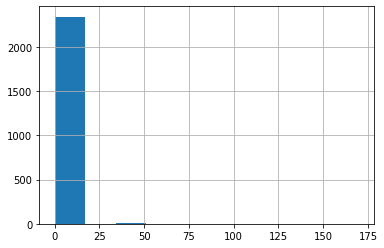

In [13]:
df_twitter.rating_denominator.hist();

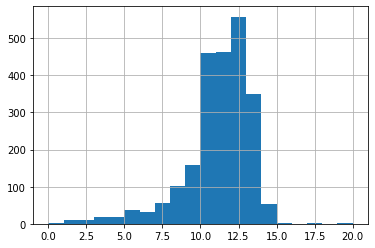

In [14]:
df_twitter.rating_numerator.hist(bins=[x for x in range(21)]);

### Dataset \#2

In [15]:
df_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1956,864873206498414592,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False
169,668989615043424256,https://pbs.twimg.com/media/CUi6geuUYAIvE9n.jpg,1,pug,0.917326,True,waffle_iron,0.014918,False,Chihuahua,0.013524,True
1592,798673117451325440,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
941,704054845121142784,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True
748,687807801670897665,https://pbs.twimg.com/media/CYuVi9pWwAAbOGC.jpg,1,Staffordshire_bullterrier,0.151113,True,boxer,0.135697,True,American_Staffordshire_terrier,0.086591,True
35,666437273139982337,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,1,Chihuahua,0.671853,True,beagle,0.124680,True,Saluki,0.044094,True
1231,745789745784041472,https://pbs.twimg.com/media/ClmT0KHWkAAXbhy.jpg,1,Pekinese,0.984267,True,Shih-Tzu,0.008942,True,cocker_spaniel,0.001928,True
542,677228873407442944,https://pbs.twimg.com/media/CWYAEINW4AIuw8P.jpg,1,common_iguana,0.566338,False,tennis_ball,0.154646,False,green_lizard,0.044976,False
1211,742528092657332225,https://pbs.twimg.com/media/Ck39W0JWUAApgnH.jpg,2,sunglasses,0.900864,False,sunglass,0.040291,False,snorkel,0.009333,False
1404,769695466921623552,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,1,pug,0.407117,True,muzzle,0.165638,False,kuvasz,0.045837,True


In [16]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


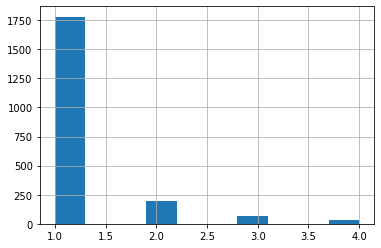

In [17]:
df_predictions.img_num.hist()

In [18]:
df_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
African_crocodile       1
bald_eagle              1
Japanese_spaniel        1
hammer                  1
mailbox                 1
Name: p1, Length: 378, dtype: int64

### Dataset \#3

In [19]:
df_api.sample(10)

,tweet_id,retweet_count,favorite_count
227,848213670039564288,832,8834
1438,696886256886657024,2016,5317
2103,670474236058800128,835,1635
762,778027034220126208,1885,7320
1309,707021089608753152,1540,4433
616,796387464403357696,4861,12334
58,880872448815771648,3989,21734
1043,743595368194129920,7445,20275
1902,674632714662858753,637,1617
1700,680934982542561280,497,2285


In [20]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


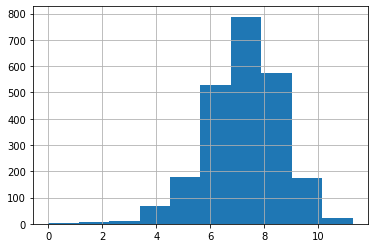

In [21]:
df_api.retweet_count.apply(lambda x: np.log(x+1)).hist();

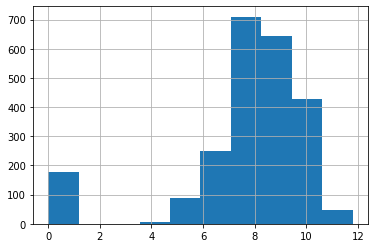

In [22]:
df_api.favorite_count.apply(lambda x: np.log(x+1)).hist();

## Cleaning data

### Key Points

Key points to keep in mind when data wrangling for this project:

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

#### Data issue #1

time stamp format

In [23]:
df_twitter_clean = df_twitter.copy()
df_twitter_clean.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [24]:
pd.to_datetime(df_twitter_clean.timestamp).head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

Great new: Pandas' parsing works well; there is no need to clean the orginal string.

In [25]:
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean.timestamp)
df_twitter_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

#### Data issue #2 

the name issue

In [26]:
df_twitter_clean[df_twitter_clean.name.str.title() != df_twitter_clean.name].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
not              2
CeCe             2
getting          2
mad              2
actually         2
old              1
DonDon           1
light            1
unacceptable     1
infuriating      1
this             1
such             1
by               1
DayZ             1
my               1
his              1
life             1
JD               1
BeBe             1
officially       1
space            1
all              1
incredibly       1
Name: name, dtype: int64

These names do not look like real name. I am gonna replace them with NaN.

In [27]:
df_twitter_clean.loc[df_twitter_clean.name.str.title() != df_twitter_clean.name, 'name'] = np.nan

In [28]:
df_twitter_clean.name.value_counts()

None       745
Charlie     12
Lucy        11
Oliver      11
Cooper      11
          ... 
Stark        1
Comet        1
Vince        1
Ginger       1
Jordy        1
Name: name, Length: 927, dtype: int64

#### Data issue #3



Variable `source` contains unnecessary information

In [29]:
df_twitter_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [30]:
df_twitter_clean['source'] = df_twitter_clean.source.apply(lambda x: re.findall(">(.*)</a>", x)[0])

In [31]:
df_twitter_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Data issue #4



Remove the retweeted

In [32]:
df_twitter_clean[~df_twitter_clean.retweeted_status_id.isna()].text.head()

19    RT @dog_rates: This is Canela. She attempted s...
32    RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
36    RT @dog_rates: This is Lilly. She just paralle...
68    RT @dog_rates: This is Emmy. She was adopted t...
73    RT @dog_rates: Meet Shadow. In an attempt to r...
Name: text, dtype: object

It seems original tweets have na value in `retweeted_status_id`. So we are gonna remove those don't.

In [33]:
df_twitter_clean = df_twitter_clean[df_twitter_clean.retweeted_status_id.isna()]
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

In [34]:
df_twitter_clean[~df_twitter_clean.in_reply_to_status_id.isna()].text.head()

30     @NonWhiteHat @MayhewMayhem omg hello tanner yo...
55     @roushfenway These are good dogs but 17/10 is ...
64                       @RealKentMurphy 14/10 confirmed
113    @ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...
148    @Jack_Septic_Eye I'd need a few more pics to p...
Name: text, dtype: object

Similarly, we need remove those with non-null values in `retweeted_status_id`. These tweets look like follow-up discussions.

In [35]:
df_twitter_clean = df_twitter_clean[df_twitter_clean.in_reply_to_status_id.isna()]
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

#### Tidiness issue #1 Merge data

Since our main table has been cleaned, we are ready to merge all three tables. 

In [36]:
df1 = df_twitter_clean.merge(df_predictions, on='tweet_id', how='left').merge(df_api, on='tweet_id', how='left')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

#### Data issue #5

We find a new issue coming after matching. Some tweets do not have a pic url. So we are gonna remove them.

In [38]:
df1_clean = df1[~df1.jpg_url.isna()]

In [39]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1971 non-null   datetime64[ns, UTC]
 4   source                      1971 non-null   object             
 5   text                        1971 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1971 non-null   object             
 10  rating_numerator            1971 non-null   int64           

#### Data issue #6

Drop tweets with pictures that are not dogs. I impose a low standard: tweets with at least one valid breed label from prediction results are kept.

In [40]:
df1_clean = df1_clean[df1_clean.p1_dog | df1_clean.p2_dog | df1_clean.p3_dog]

#### Data issue #7

There are three predictions of dog's breed. For analysis, we only need one.

In [41]:
def return_label(x):
    if x.p1_dog:
        return x.p1
    elif x.p2_dog:
        return x.p2
    elif x.p3_dog:
        return x.p3
    else:
        return np.nan

In [42]:
df1_clean['breed'] = df1_clean.apply(return_label, axis=1)

In [43]:
df1_clean['breed'].value_counts()

golden_retriever        156
Labrador_retriever      106
Pembroke                 94
Chihuahua                90
pug                      62
                       ... 
Japanese_spaniel          1
Irish_wolfhound           1
Bouvier_des_Flandres      1
clumber                   1
EntleBucher               1
Name: breed, Length: 113, dtype: int64

Further, I need to clean these labels, replacing `-` and `_` with spaces.

In [44]:
df1_clean['breed'] = df1_clean['breed'].str.strip().str.replace('-',' ').str.replace('_',' ').str.lower()

#### Tidiness issue #2

Dog "stage" should be consolidated into one variable.

In [45]:
stage_list = ['doggo','floofer','pupper','puppo']
for x in stage_list:
    print(df1_clean[x].value_counts())
    print()

None     1603
doggo      63
Name: doggo, dtype: int64

None       1658
floofer       8
Name: floofer, dtype: int64

None      1493
pupper     173
Name: pupper, dtype: int64

None     1644
puppo      22
Name: puppo, dtype: int64



In [46]:
df1_clean['stage'] = df1_clean.apply(
    lambda x: ''.join([str(int(x[stage] == stage)) for stage in stage_list]), 
    axis=1)

In [47]:
df1_clean['stage'].value_counts()

0000    1409
0010     166
1000      54
0001      21
1010       7
0100       7
1001       1
1100       1
Name: stage, dtype: int64

In [48]:
for i in range(4):
    print("There are {:3} dogs in stage {}.".format(
        df1_clean['stage'].apply(lambda x: int(x[i])).sum(), stage_list[i]
    ))

There are  63 dogs in stage doggo.
There are   8 dogs in stage floofer.
There are 173 dogs in stage pupper.
There are  22 dogs in stage puppo.


These numbers match the results of value_counts(). So our transformation is successful.

Here, the i-th digit corresponds to the i-th elements of the list `['doggo','floofer','pupper','puppo']`. 

For example, 
- 0010 represents `pupper`.
- 1100 represents both `doggo` and `floofer`, which may not be a valid value. But we keep it here.

However, this variable may not be very useful. I create `stage2` which treats those with multiple stage labels as NaN.

In [49]:
df1_clean['stage2'] = df1_clean['stage'].map({"1000":"doggo",'0100':'floofer','0010':'pupper','0001':'puppo'})
df1_clean['stage2'].value_counts()

pupper     166
doggo       54
puppo       21
floofer      7
Name: stage2, dtype: int64

#### Data issue #8

Drop redundent variables and correct data type all together here.

In [50]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2096
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1666 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1666 non-null   datetime64[ns, UTC]
 4   source                      1666 non-null   object             
 5   text                        1666 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1666 non-null   object             
 10  rating_numerator            1666 non-null   int64           

In [51]:
df_final = df1_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id',
                               'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])
df_final.drop(columns=stage_list, inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2096
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   int64              
 1   timestamp           1666 non-null   datetime64[ns, UTC]
 2   source              1666 non-null   object             
 3   text                1666 non-null   object             
 4   expanded_urls       1666 non-null   object             
 5   rating_numerator    1666 non-null   int64              
 6   rating_denominator  1666 non-null   int64              
 7   name                1581 non-null   object             
 8   jpg_url             1666 non-null   object             
 9   img_num             1666 non-null   float64            
 10  p1                  1666 non-null   object             
 11  p1_conf             1666 non-null   float64            
 12  p1_dog              1666 non-null 

In [52]:
df_final.drop(columns=df_final.columns[10:19], inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2096
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   int64              
 1   timestamp           1666 non-null   datetime64[ns, UTC]
 2   source              1666 non-null   object             
 3   text                1666 non-null   object             
 4   expanded_urls       1666 non-null   object             
 5   rating_numerator    1666 non-null   int64              
 6   rating_denominator  1666 non-null   int64              
 7   name                1581 non-null   object             
 8   jpg_url             1666 non-null   object             
 9   img_num             1666 non-null   float64            
 10  retweet_count       1666 non-null   int64              
 11  favorite_count      1666 non-null   int64              
 12  breed               1666 non-null 

In [53]:
df_final['img_num']  = df_final.img_num.apply(int)
# df_final['tweet_id'] = df_final.tweet_id.apply(str)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2096
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   int64              
 1   timestamp           1666 non-null   datetime64[ns, UTC]
 2   source              1666 non-null   object             
 3   text                1666 non-null   object             
 4   expanded_urls       1666 non-null   object             
 5   rating_numerator    1666 non-null   int64              
 6   rating_denominator  1666 non-null   int64              
 7   name                1581 non-null   object             
 8   jpg_url             1666 non-null   object             
 9   img_num             1666 non-null   int64              
 10  retweet_count       1666 non-null   int64              
 11  favorite_count      1666 non-null   int64              
 12  breed               1666 non-null 

In [54]:
df_final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,retweet_count,favorite_count,breed,stage,stage2
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,6514,33819,chihuahua,0000,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,4328,25461,chihuahua,0000,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,8964,42908,labrador retriever,0000,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,9774,41048,basset,0000,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,3261,20562,chesapeake bay retriever,0000,NaN


The data looks good now.

## Storing, Analyzing, and Visualizing Data

### Storing

In [55]:
df_final.to_csv('data/twitter_archive_master.csv', index = False)

In [56]:
!ls

data              twitter-api.py    wrangle_act.ipynb
reports           wrangle_act.html


### Analyzing, and Visualizing

First, we load the data.

In [57]:
data = pd.read_csv('data/twitter_archive_master.csv').drop(['expanded_urls','jpg_url','tweet_id','text'],axis=1)
data.head()

,timestamp,source,rating_numerator,rating_denominator,name,img_num,retweet_count,favorite_count,breed,stage,stage2
0,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,1,6514,33819,chihuahua,0,NaN
1,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,1,4328,25461,chihuahua,0,NaN
2,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,1,8964,42908,labrador retriever,0,NaN
3,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,2,9774,41048,basset,0,NaN
4,2017-07-29 00:08:17+00:00,Twitter for iPhone,13,10,None,1,3261,20562,chesapeake bay retriever,0,NaN


In [58]:
data.timestamp = pd.to_datetime(data.timestamp)

#### Explore #1. What dog breeds are the most popular?

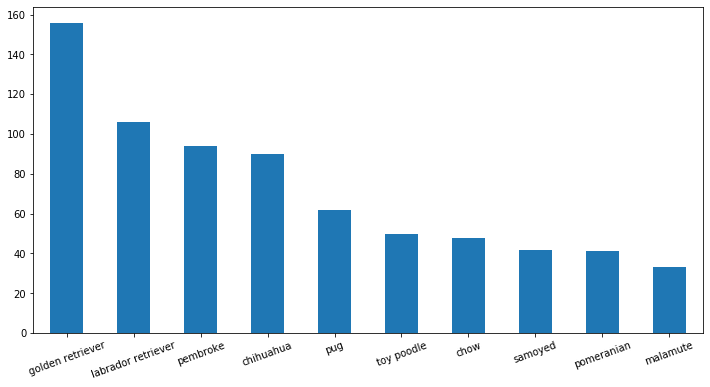

In [59]:
plt.figure(figsize=(12,6))
data.breed.value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=20);

It seems golden retriever is the most popluar dog breed, since it gets highest number of original tweets. However, this sounds more like prevalence. In what follows, I will use `rating`, `retweet count`, and `favorite count` to measure popularity.

First, I standardize all rating to a base of 10 and put a cap of 20.

In [60]:
data['standardized_rating'] = (data.rating_numerator/data.rating_denominator*10)\
                                    .apply(lambda x: min(x, 20))

In addition to ratings, we consider retweets and favorites as alternative indicators of popularity. Since these two numbers all highly skewed, a log transformation is preferred.

In [61]:
data['retweet_log']  = np.log(data.retweet_count +1)
data['favorite_log'] = np.log(data.favorite_count+1)

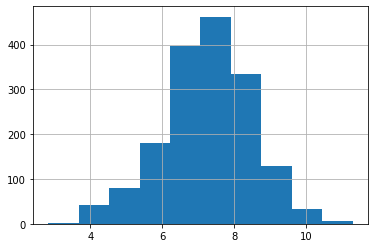

In [62]:
data['retweet_log'].hist();

In [63]:
df_by_breed = data.groupby('breed').mean()[['retweet_log','favorite_log','standardized_rating']]
df_by_breed['count'] = data.breed.value_counts()
df_by_breed.head()

,retweet_log,favorite_log,standardized_rating,count
breed,,,,
afghan hound,8.468199,9.616398,9.666667,3
airedale,6.840938,7.986674,9.833333,12
american staffordshire terrier,7.425679,8.707237,10.312500,16
appenzeller,7.154701,8.628749,11.000000,2
australian terrier,7.578673,8.810274,11.500000,2


I only consider breeds with at least 5 tweets.

In [64]:
rating_top10 = df_by_breed.query('count >= 5').standardized_rating.sort_values(ascending=False).head(10)
rating_top10 = rating_top10.reset_index()
rating_top10

,breed,standardized_rating
0,border terrier,12.142857
1,samoyed,11.690476
2,golden retriever,11.584499
3,great pyrenees,11.466667
4,pembroke,11.425532
5,chow,11.416667
6,eskimo dog,11.409091
7,norfolk terrier,11.333333
8,cocker spaniel,11.333333
9,doberman,11.333333


We use the violin plot to show the rating distribution within the breed.

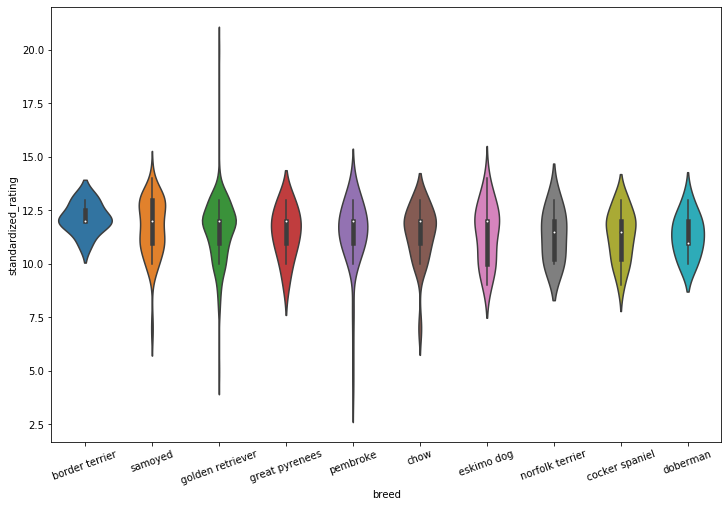

In [65]:
plt.figure(figsize=(12,8))
sb.violinplot(x="breed", y="standardized_rating", kind="violin", order=rating_top10.breed,
              data=data[data.breed.isin(rating_top10.breed)]);
plt.xticks(rotation=20);

In [66]:
retweet_top10 = df_by_breed.query('count >= 5').retweet_log.sort_values(ascending=False).head(10)
retweet_top10 = retweet_top10.reset_index()
retweet_top10

,breed,retweet_log
0,bedlington terrier,8.221660
1,great pyrenees,7.950273
2,norwegian elkhound,7.847097
3,french bulldog,7.845402
4,samoyed,7.836991
5,cardigan,7.724148
6,border terrier,7.722305
7,golden retriever,7.656583
8,mexican hairless,7.630108
9,kelpie,7.618931


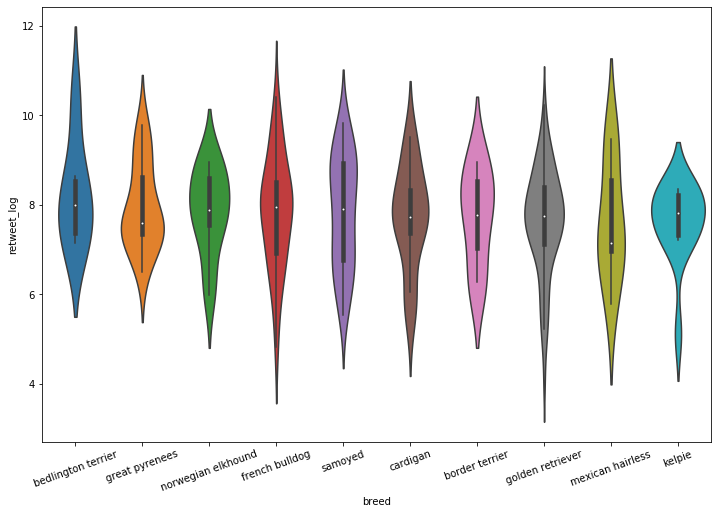

In [67]:
plt.figure(figsize=(12,8))
sb.violinplot(x="breed", y="retweet_log", kind="violin", order=retweet_top10.breed,
              data=data[data.breed.isin(retweet_top10.breed)]);
plt.xticks(rotation=20);

In [68]:
favorite_top10 = df_by_breed.query('count >= 5').favorite_log.sort_values(ascending=False).head(10)
favorite_top10 = favorite_top10.reset_index()
favorite_top10

,breed,favorite_log
0,bedlington terrier,9.545414
1,border terrier,9.165118
2,french bulldog,9.153626
3,great pyrenees,9.048692
4,norwegian elkhound,9.011878
5,cardigan,8.978389
6,flat coated retriever,8.961150
7,samoyed,8.911207
8,kelpie,8.889340
9,golden retriever,8.860655


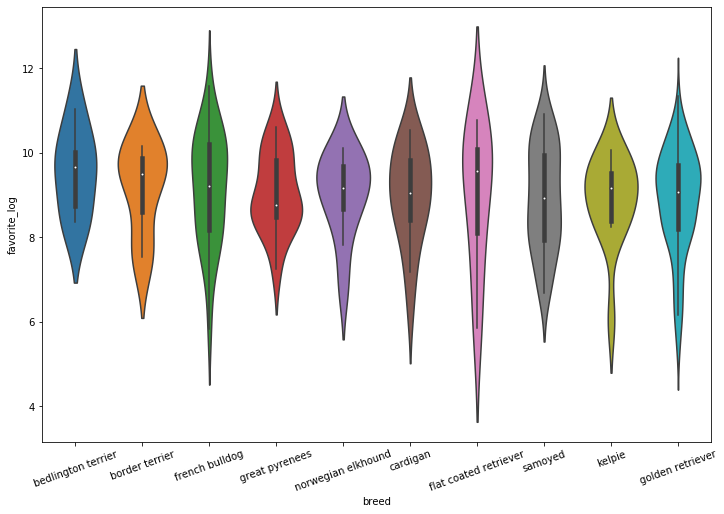

In [69]:
plt.figure(figsize=(12,8))
sb.violinplot(x="breed", y="favorite_log", kind="violin", order=favorite_top10.breed,
              data=data[data.breed.isin(favorite_top10.breed)]);
plt.xticks(rotation=20);

In [70]:
all_top10 = rating_top10.merge(retweet_top10, on='breed').merge(favorite_top10, on='breed')
all_top10

,breed,standardized_rating,retweet_log,favorite_log
0,border terrier,12.142857,7.722305,9.165118
1,samoyed,11.690476,7.836991,8.911207
2,golden retriever,11.584499,7.656583,8.860655
3,great pyrenees,11.466667,7.950273,9.048692


In [71]:
all_top10 = all_top10.melt(value_vars=['standardized_rating','retweet_log','favorite_log'], 
                           id_vars='breed',
                           var_name='measure')
all_top10

,breed,measure,value
0,border terrier,standardized_rating,12.142857
1,samoyed,standardized_rating,11.690476
2,golden retriever,standardized_rating,11.584499
3,great pyrenees,standardized_rating,11.466667
4,border terrier,retweet_log,7.722305
5,samoyed,retweet_log,7.836991
6,golden retriever,retweet_log,7.656583
7,great pyrenees,retweet_log,7.950273
8,border terrier,favorite_log,9.165118
9,samoyed,favorite_log,8.911207


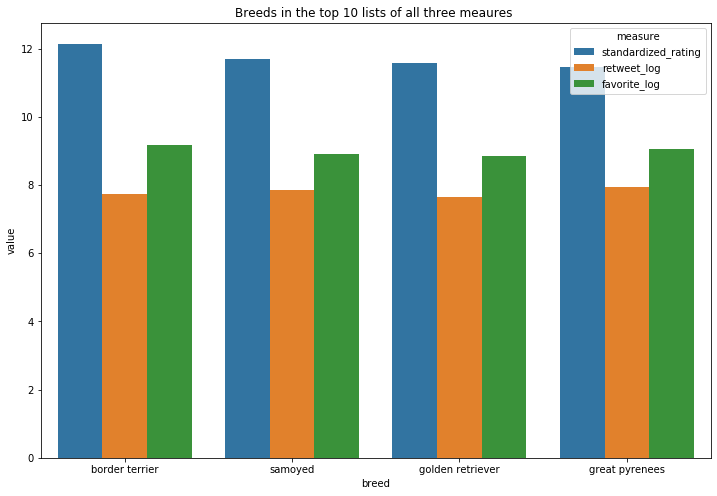

In [72]:
plt.figure(figsize=(12,8))
sb.barplot(x="breed", y="value", hue="measure", data=all_top10)
plt.title("Breeds in the top 10 lists of all three meaures ");

Hence, I believe these four breeds are the true most popular breeds.

### Explore 2. Time trend of engagement

In [73]:
data['month'] = data.timestamp.dt.to_period(freq='M')

/Users/luzk/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [74]:
df1 = data.groupby('month').sum()[['retweet_count', 'favorite_count']]
df1['tweet_count']  = data.month.value_counts()
df1['tweet_log']    = np.log(df1.tweet_count+1)
df1['retweet_log']  = np.log(df1.retweet_count +1)
df1['favorite_log'] = np.log(df1.favorite_count+1)

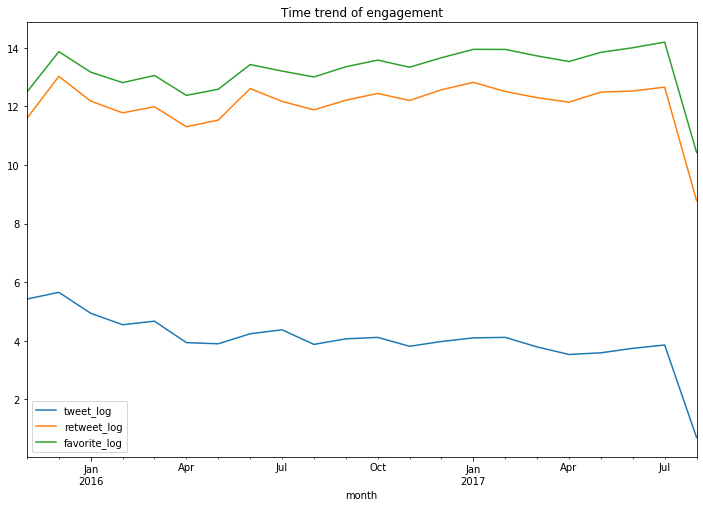

In [75]:
df1.iloc[:,3:].plot(figsize=(12,8))
plt.title('Time trend of engagement');

### Explore #3.  Does the timing of posting a tweet matter?

If a participant wants to get a higher rate and more retweets, on which day of the week should she tweet? 

Here, we only explore the weekday effect. Similar questions could be raised regarding other aspects of timing, like what time within a day.

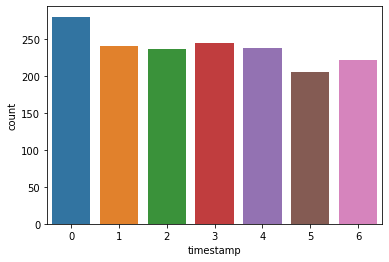

In [76]:
sb.countplot(data.timestamp.dt.weekday);

In [77]:
data['weekday'] = data.timestamp.dt.weekday

In [78]:
var_list = ['retweet_count','favorite_count','retweet_log','favorite_log','standardized_rating']
df_by_weekday = data.groupby('weekday').mean()[var_list].reset_index()
df_by_weekday

,weekday,retweet_count,favorite_count,retweet_log,favorite_log,standardized_rating
0,0,2737.417857,8949.642857,7.151967,8.317449,10.721429
1,1,2843.522822,9635.834025,7.285225,8.469323,11.016598
2,2,3167.894515,10373.915612,7.328740,8.511454,10.777138
3,3,2567.426230,8664.143443,7.195711,8.377904,10.856557
4,4,2777.508403,9079.516807,7.304282,8.498090,10.976318
5,5,3085.170732,9355.141463,7.212907,8.413741,10.765854
6,6,2713.321267,9025.253394,7.165073,8.353108,10.687783


In [79]:
df_by_weekday = df_by_weekday.melt(value_vars=var_list, id_vars='weekday', var_name='measure')
df_by_weekday

,weekday,measure,value
0,0,retweet_count,2737.417857
1,1,retweet_count,2843.522822
2,2,retweet_count,3167.894515
3,3,retweet_count,2567.426230
4,4,retweet_count,2777.508403
5,5,retweet_count,3085.170732
6,6,retweet_count,2713.321267
7,0,favorite_count,8949.642857
8,1,favorite_count,9635.834025
9,2,favorite_count,10373.915612


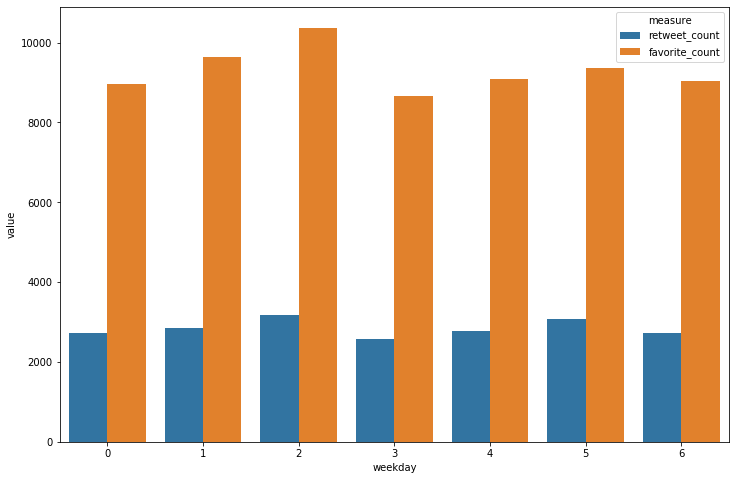

In [80]:
plt.figure(figsize=(12,8))
sb.barplot(x="weekday", y="value", hue="measure", data=df_by_weekday.query('value>100'));

It seems tweeting on Wednesday can get a higher number of retweet and favorite. However, this results could be driven by some extreme cases because we are using the arithmetic mean. Let's take a look at the average of log and ratings.

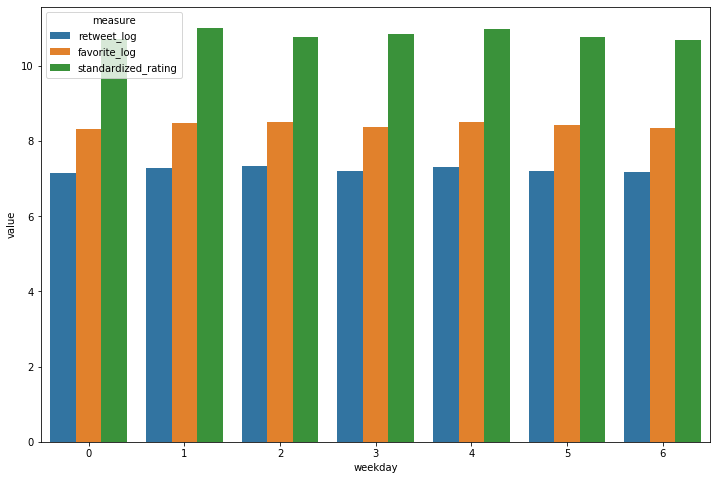

In [81]:
plt.figure(figsize=(12,8))
sb.barplot(x="weekday", y="value", hue="measure", data=df_by_weekday.query('value<100'));

Now the advantage of Wednesday is gone. It seems there is no difference between different weekdays.

### Summary

In this section, we have explored three topics:
1. What dog breeds are the most popular
2. The Time trend of twitter engagement
3. Best timing of posting a tweet